# SL4-Predicting key factors of USA health insurance cost

The dataset can be obtained from https://www.kaggle.com/mirichoi0218/insurance
    
To handle the data (a table in csv format), we will use the pandas library for Python. 
Useful tutorials can be found at https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction to `pandas` for data visualization

### 1.1 Importing the database and having a first look at the data

In [2]:
# Importing the csv data
data = pd.read_csv("./Data/insurance.csv")  # this will import the data and create a dataframe

Some information on the imported database can be printed using the commands `head()`, `describe()` and `info()`

In [3]:
data.head()  # print the calumn names and first 5 rows of the dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()  # print some basic statistics

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()  # get info about shape of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print(data.isnull().values.any())  # check if there are missing values

False


As we can see, the table has 1338 entries (rows) and 7 columns named
- age (int)
- sex (object)
- bmi (float): body mass index
- children (int)
- smoker (object)
- region (object): the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges (float): Individual medical costs billed by health insurance

### 1.2 Replacing text by numerical data

In [7]:
data = data.replace({'male': 1, 'female': 2, 'no': 0, 'yes': 1})  # for sex and smoker columns
data = data.replace({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3})
# Alternatively
# data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
# data['sex'] = data['sex'].map({'male': 1, 'female': 2})
# data['region'] = data['region'].map({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3})

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


This can be done in a more compact way as follows:

In [8]:
df = data
df[['smoker', 'region', 'sex']].apply(lambda x: x.astype('category').astype(int))
# The above line is equivalent to the followinfg for loop:
# for col in ['smoker', 'region', 'sex']:
#     df[col] = df[col].astype('category').astype(int)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


### 1.3 Splitting the dataset between train and test data

We will split the dataset between the training dataset `train` and the testing dataset `test`.

The goal will be to find the best possible prediction of the medical cost given the other variables (age, sex...). To test how good the prediction is, we wil use the training set. 

In [11]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

### 1.4 Plotting the data

Data visualization is an important step before applying any machine mearning model.

Here we will explore different methods to plot some interesting statistics and to spot possible correlations in our data.

**Scatterplot**

You can conveniently do a scatter plot the data with one the following methods. 

<AxesSubplot:xlabel='age', ylabel='charges'>

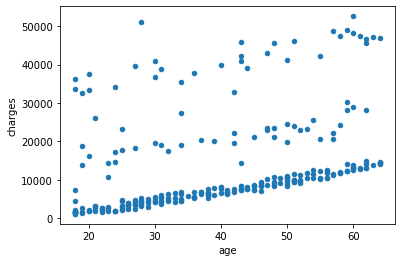

In [12]:
# plot applied to the pandas object
fig, ax = plt.subplots(figsize=(6,4))
test.plot.scatter('age', 'charges', ax=ax)

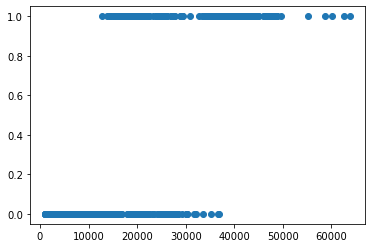

In [13]:
# plot after transforming data into numpy arrays
x = np.array(train["smoker"])
y = np.array(train["charges"])
plt.scatter(y, x)
plt.show()

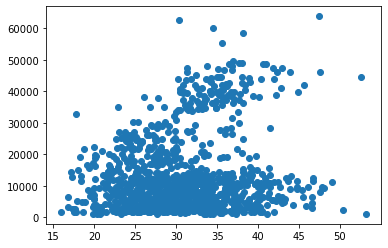

In [14]:
# plot after extracting data from the data frame, they will be numpy arrays
x = train["bmi"].values  # equivalent to np.array(train["bmi"])
y = train["charges"].values
plt.scatter(x, y)
plt.show()

Or we can plot the data and run a linear regression model fit with seaborn

              bmi   charges
bmi      1.000000  0.184416
charges  0.184416  1.000000


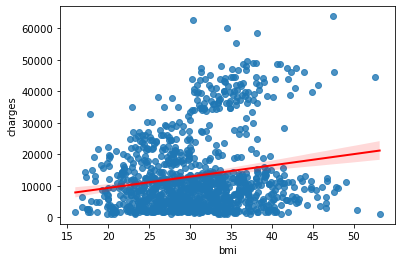

In [15]:
fig, ax = plt.subplots(figsize=(6,4))
sns.regplot(x='bmi', y='charges',data=train, line_kws={'lw': 2, 'color': 'red'},  ax=ax)
print(train[['bmi', 'charges']].corr())

**Pairwise correlations**

Pair-wise correlations can be computed with the function `corr()`. 
Large positive or negative correlations with the column `charges` indicate that the variable is an important factor in determining the price of medical cost. 

In [16]:
train.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019683,0.112190,0.056075,-0.051004,0.019280,0.280340
sex,0.019683,1.000000,-0.036158,-0.028021,-0.051603,0.025942,-0.041344
bmi,0.112190,-0.036158,1.000000,0.020194,-0.019732,-0.267257,0.184416
children,0.056075,-0.028021,0.020194,1.000000,0.026044,-0.011275,0.084363
smoker,-0.051004,-0.051603,-0.019732,0.026044,1.000000,-0.028357,0.777381
region,0.019280,0.025942,-0.267257,-0.011275,-0.028357,1.000000,-0.033425
charges,0.280340,-0.041344,0.184416,0.084363,0.777381,-0.033425,1.000000


Correlation can be conveniently visualized plotting the correlation matrix with seaborn

<AxesSubplot:>

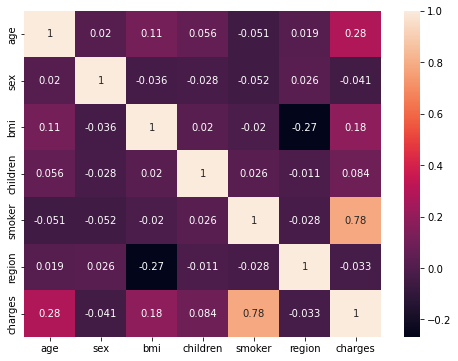

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot = True, ax=ax)

From this figure (or equivalently by inspecting the values of the correlation matrix), we see that the three key factors are 
- age
- bmi
- smoker

But We can also directly inspect the correlation matrix:

In [18]:
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.777381
age         0.280340
bmi         0.184416
children    0.084363
region     -0.033425
sex        -0.041344
Name: charges, dtype: float64

**Plotting more statistics and scatterplots** in a compact way

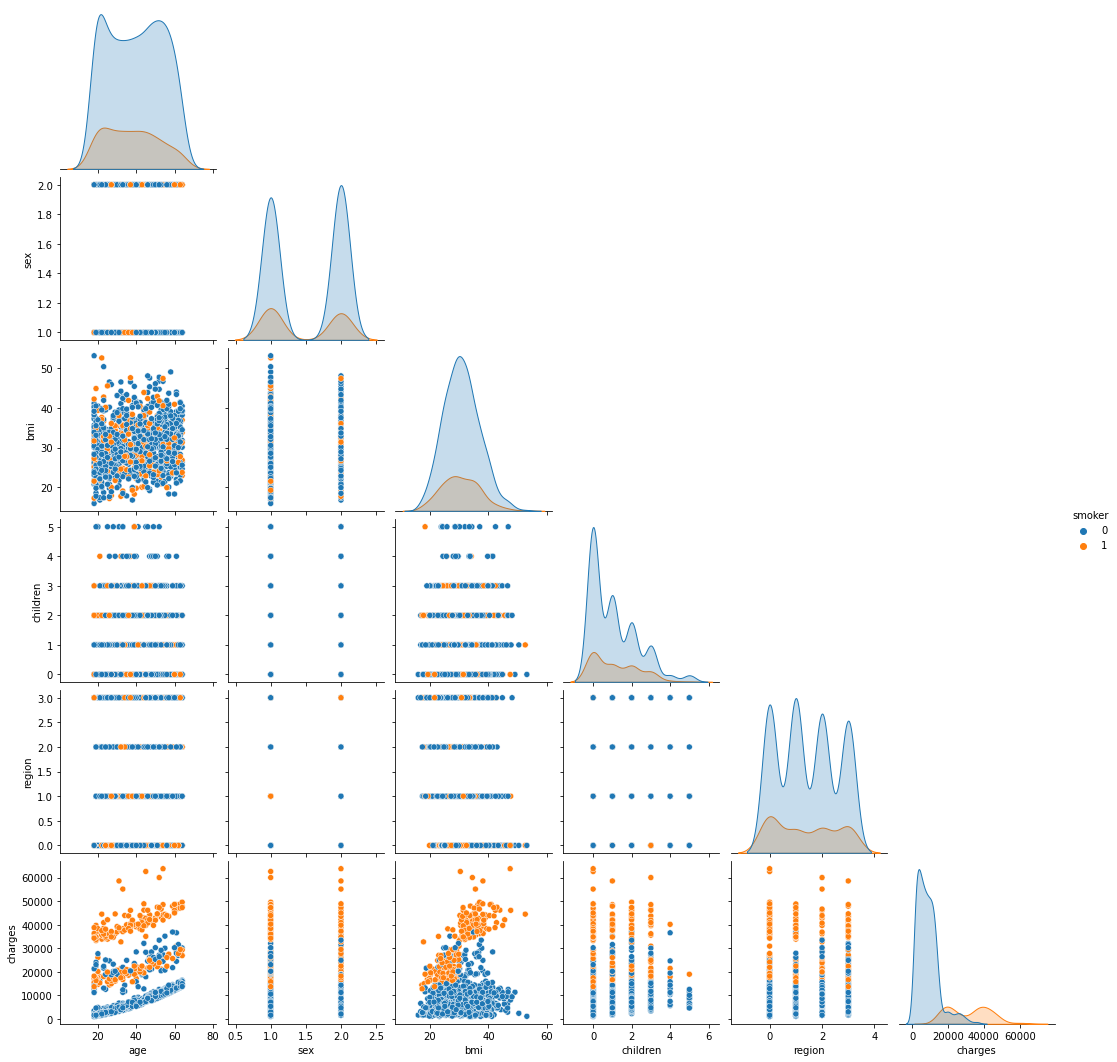

In [19]:
# fig, ax = plt.subplots(figsize=(8,6))
sns.pairplot(train, hue="smoker", corner=True)

## 2 Multivariable linear regression

### 2.1 Rescaled variables

We will first rescale the variables such that they have a zero mean and unit standard deviation.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data)  # inplace transformation

array([[-1.43876426,  1.0105187 , -0.45332   , ...,  1.97058663,
        -0.40287427,  0.2985838 ],
       [-1.50996545, -0.98959079,  0.5096211 , ..., -0.5074631 ,
        -1.28800691, -0.95368917],
       [-0.79795355, -0.98959079,  0.38330685, ..., -0.5074631 ,
        -1.28800691, -0.72867467],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , ..., -0.5074631 ,
        -1.28800691, -0.96159623],
       [-1.29636188,  1.0105187 , -0.79781341, ..., -0.5074631 ,
        -0.40287427, -0.93036151],
       [ 1.55168573,  1.0105187 , -0.26138796, ...,  1.97058663,
         0.48225837,  1.31105347]])

### 2.2 Defining training and test features and target

In [21]:
train, test = train_test_split(data, test_size=0.2, random_state=0)  # fix the random state for reproducibility

In [22]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

In [23]:
X_train.head()

,age,sex,bmi,children,smoker,region
621,37,1,34.100,4,1,1
194,18,1,34.430,0,0,0
240,23,2,36.670,2,1,3
1168,32,1,35.200,2,0,1
1192,58,2,32.395,1,0,3


In [24]:
print(y_train[:5])

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64


### 2.3 Run a linear regrssion model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()  # define an instance of the logistic regression class
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {r2_score(y_test, y_pred)}')



Accuracy: 0.799796841255606


### 2.4 Analizing/plotting important features

The class LinearRegression has an attribute called coef_

You can inspect it by `LinearRegression?`

In [26]:
LinearRegression?

In [27]:
model.coef_

array([2.53701909e+02, 1.37511428e+01, 3.36711955e+02, 4.33007767e+02,
       2.36163836e+04, 3.23662863e+02])

Now we create a pandas series with these coefficients and their names and plot their values using seaborn

In [28]:
feature_imp = pd.Series(model.coef_, index=X_train.columns).sort_values(ascending=False)


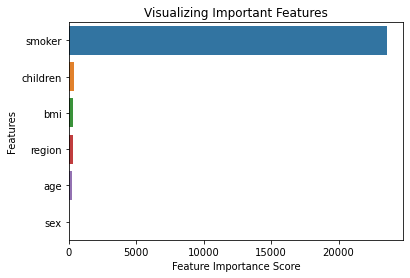

In [29]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index) 

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()